<a href="https://colab.research.google.com/github/kobrue02/evaluating-llm-generated-nlu-data/blob/main/bin/notebooks/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kobrue02/evaluating-llm-generated-nlu-data/
%cd evaluating-llm-generated-nlu-data

In [2]:
import json
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [3]:
from bin.utils.methods import *
from bin.framework.framework import Framework

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

In [7]:
dataset_names = [
    "persona_based_prompt_s1_data",
    "chain_of_thought_simple_data",
    "zero_shot_simple_data",
    "one_shot_simple_data",
    "few_shot_simple_data",
]

In [8]:
raw_dfs = [load_df(dataset_name) for dataset_name in dataset_names]
ref_df = clean_sipgate_dataset(read_sipgate_dataset())

In [ ]:
framework = Framework()
evaluated_sets = []
for gen_df in raw_dfs:
  results = framework.apply_framework_to_datasets(gen_df, ref_df)
  df = results_to_dataframe(results)
  evaluated_sets.append(df)

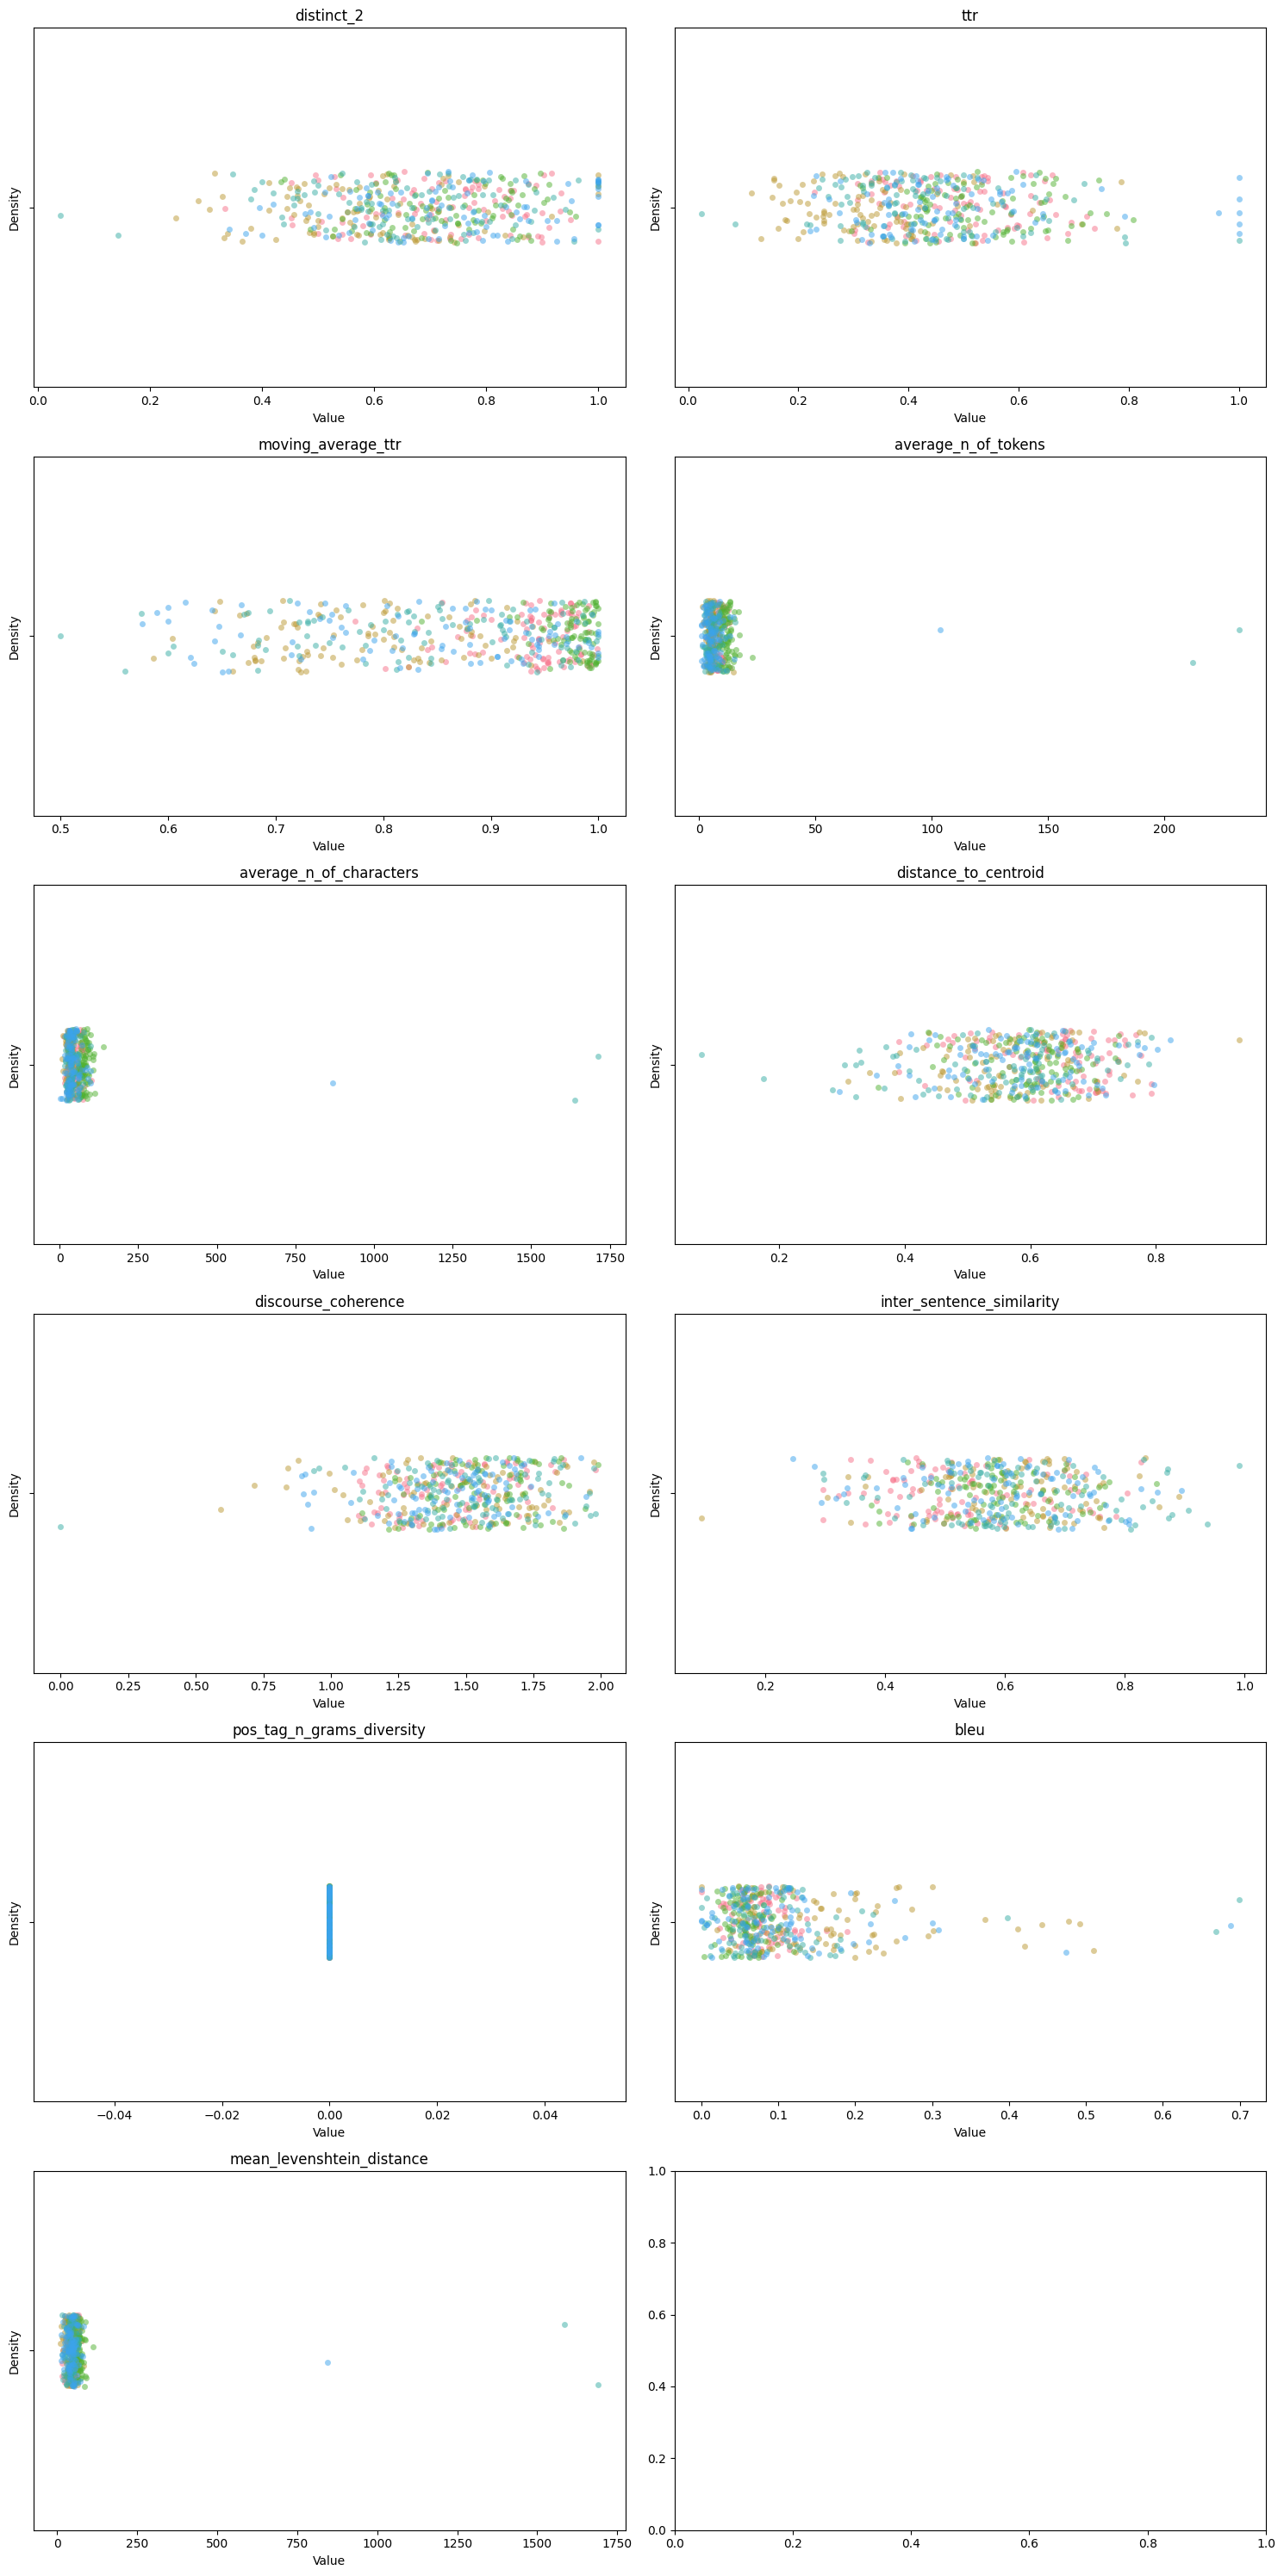

In [10]:
dfs_to_stripplots(evaluated_sets)

In [12]:
metric_dfs = transform_dfs_to_metric_dfs(evaluated_sets, dataset_names)
metric_names = list(framework.metrics)

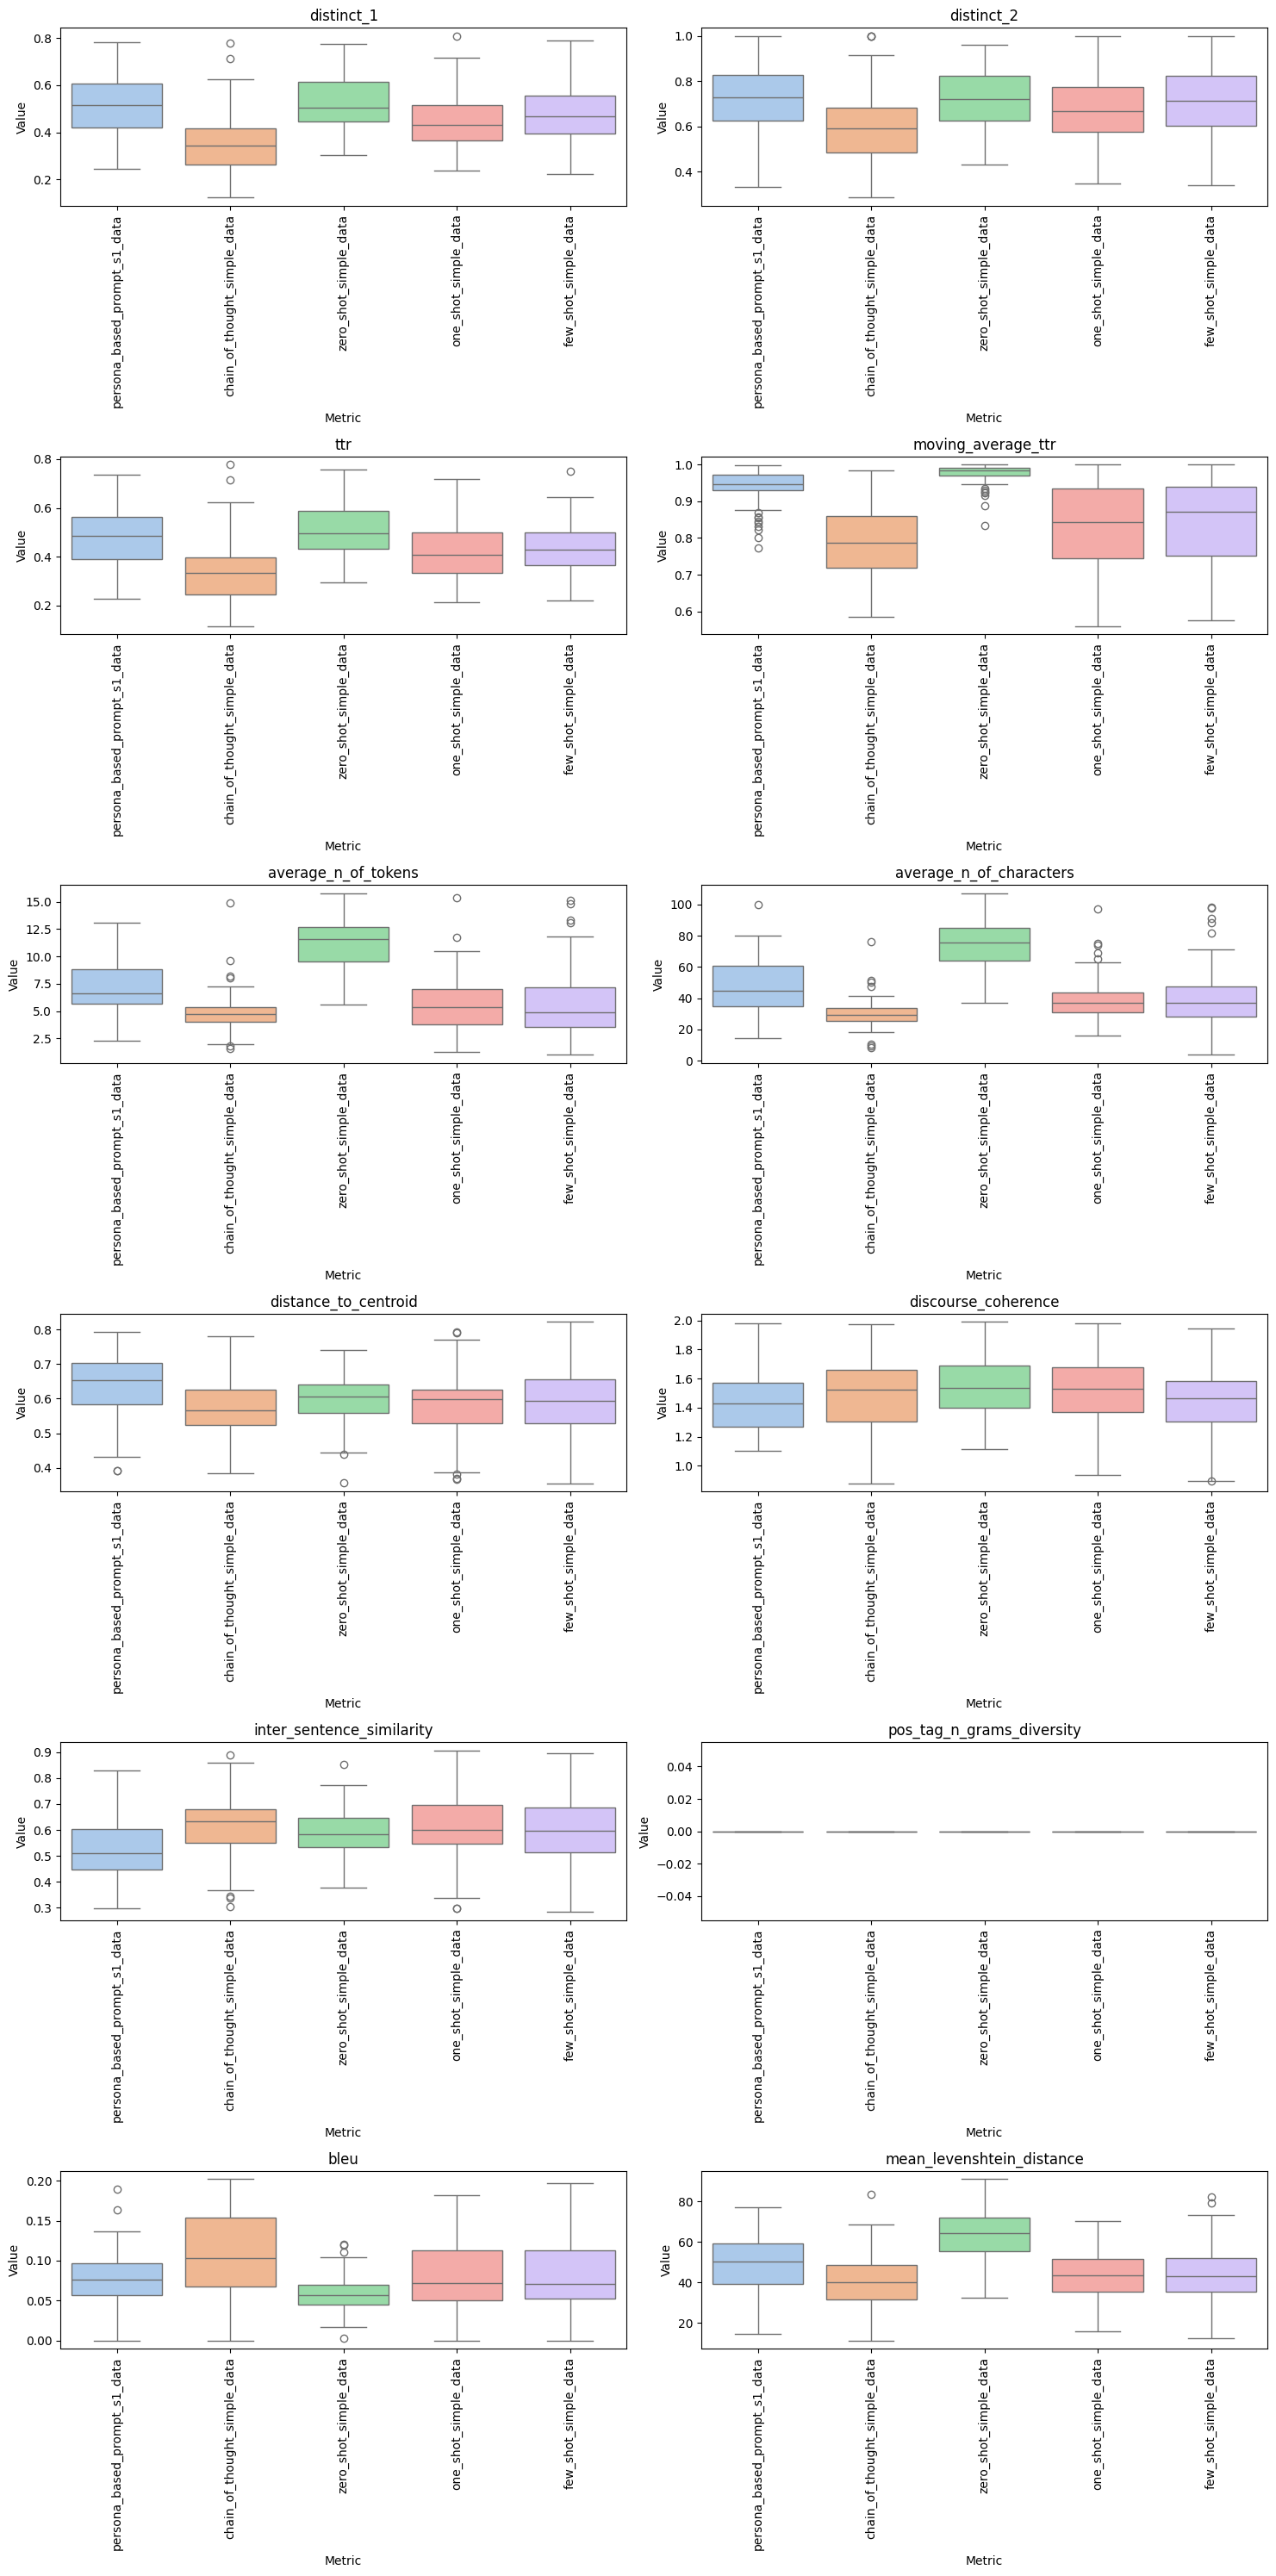

In [15]:
catplot_metric_dfs(metric_dfs, metric_names)

In [ ]:
dfs = [
    framework.apply_framework_to_datasets(load_df(dataset_name))
    for dataset_name in dataset_names
]
dfs.append(framework.apply_framework_to_datasets(ref_df))

In [19]:
result_dfs = [results_to_dataframe(df) for df in dfs]
transformed_dfs = transform_dfs_to_metric_dfs(
    result_dfs,
    columns= ["intent"] + dataset_names + ["sipgate"],
    dataset_names=dataset_names)
metric_names = list(framework.hypotheses_metrics)

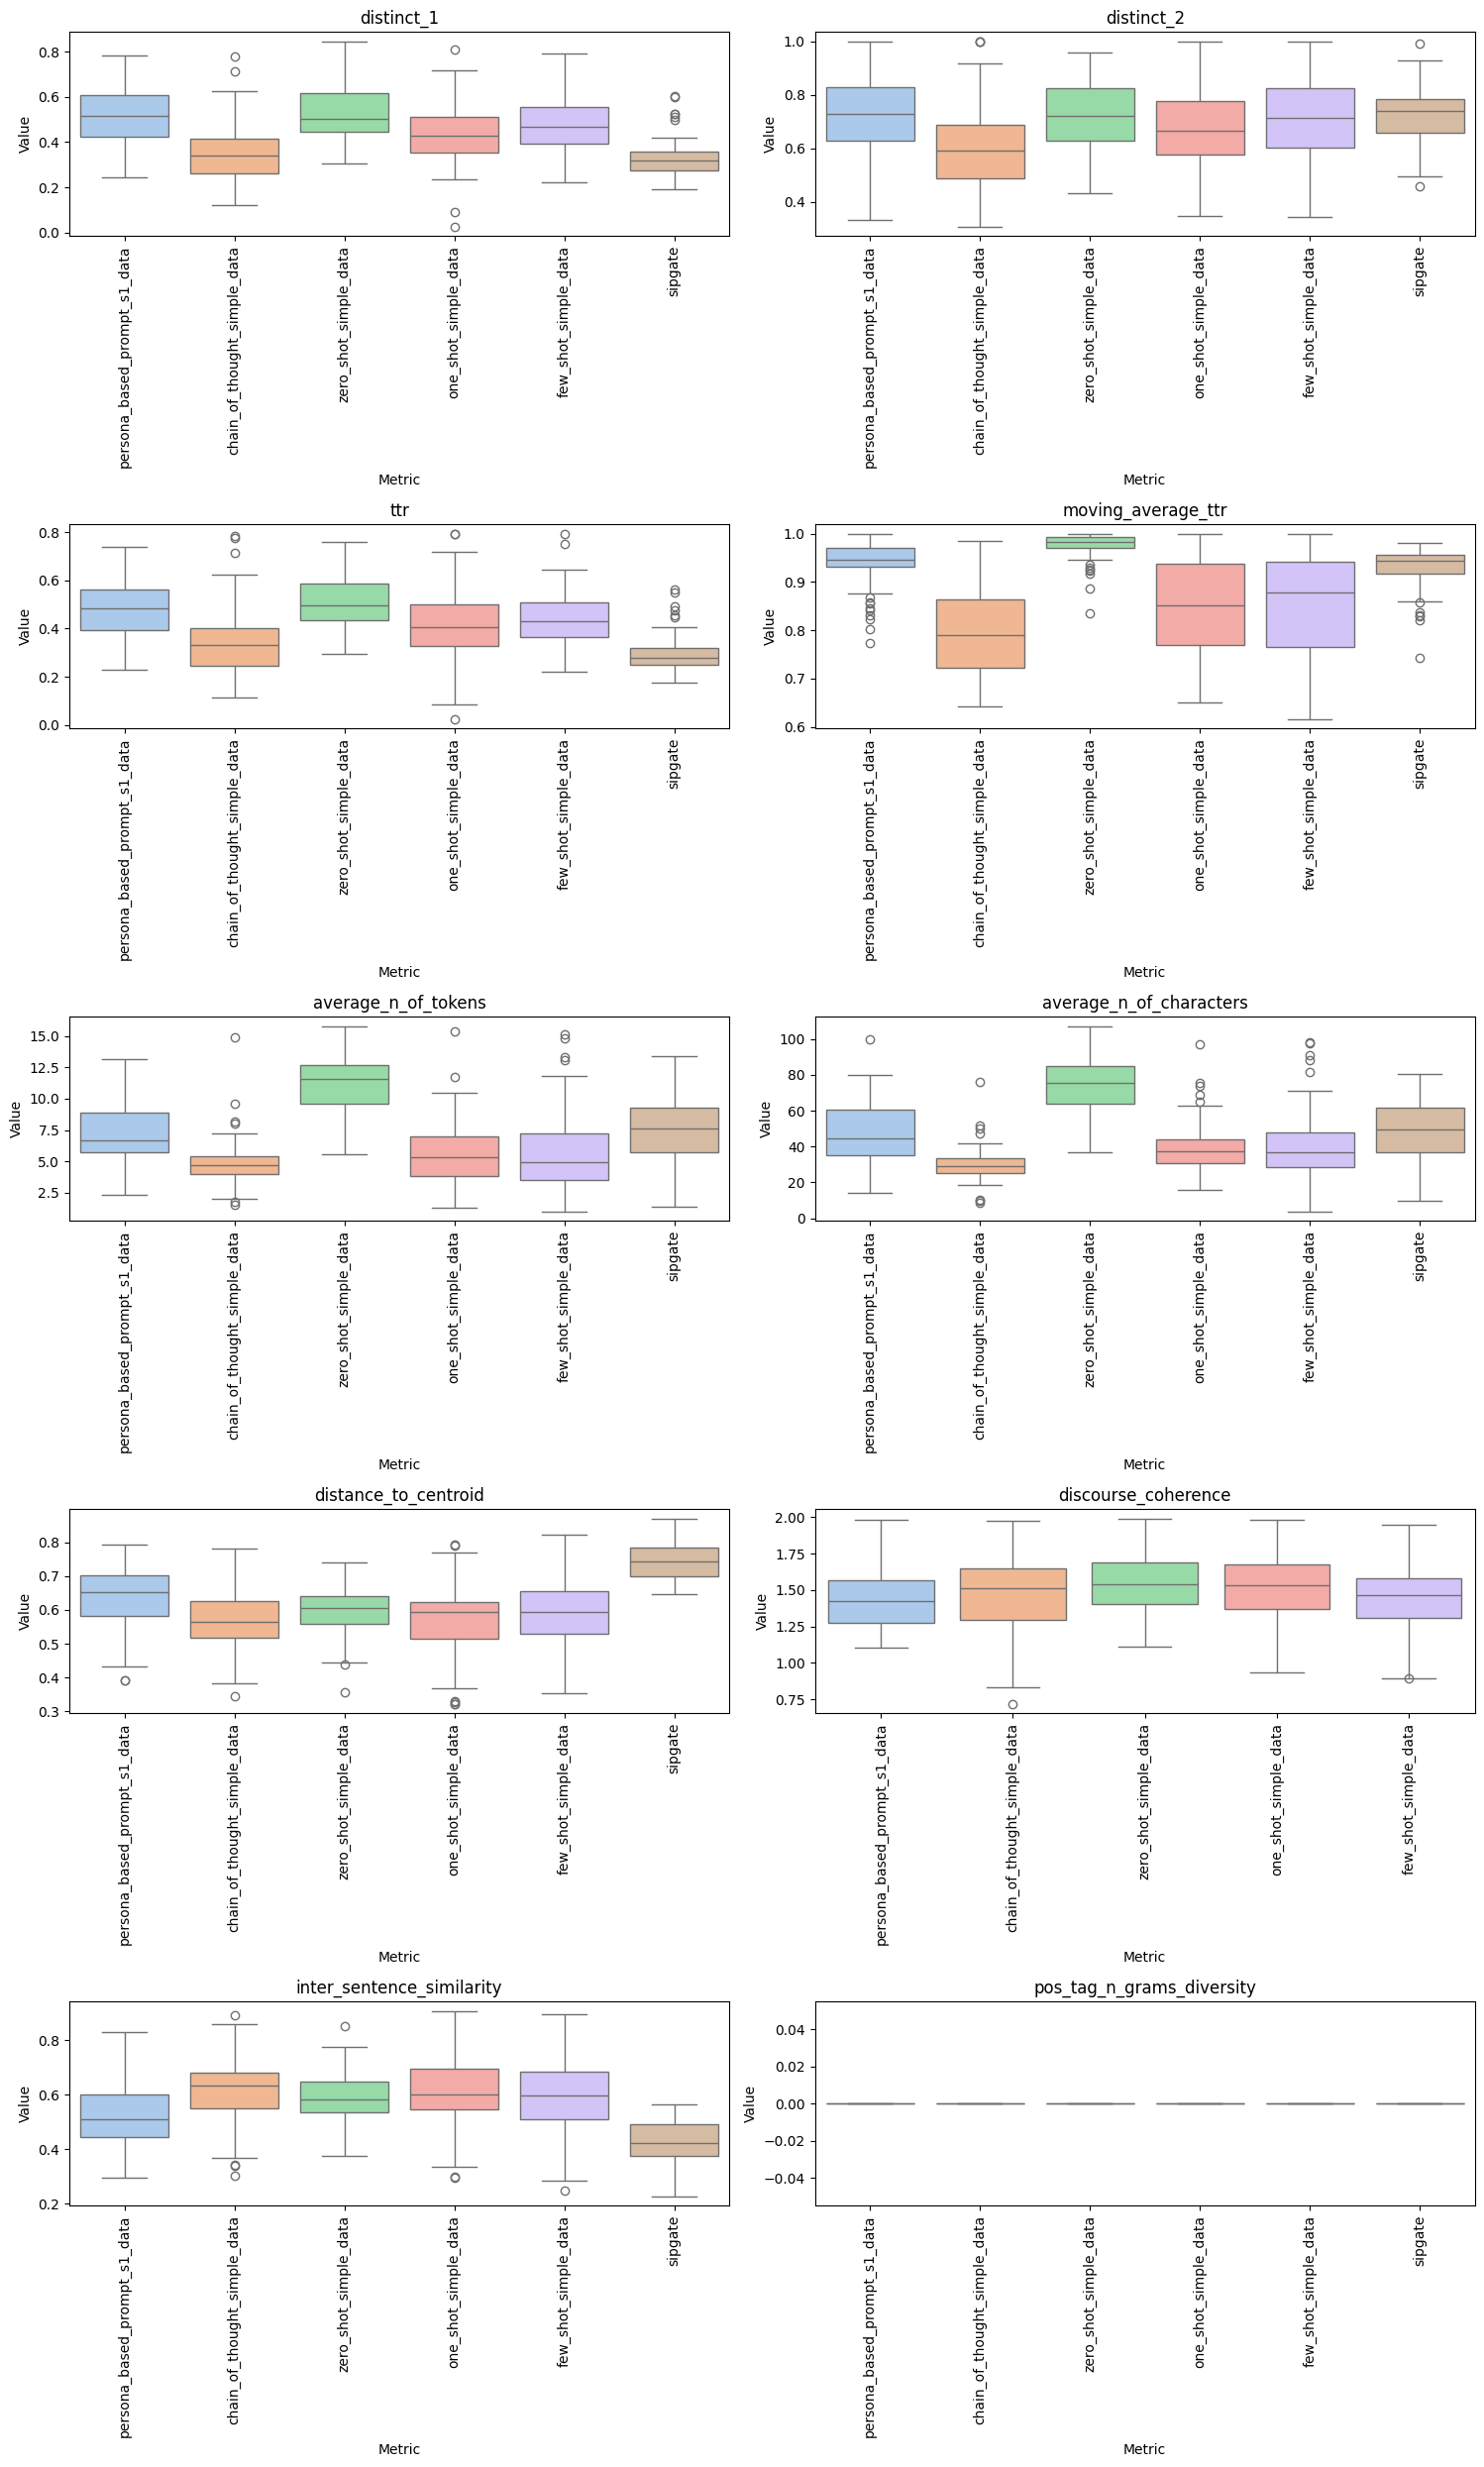

In [21]:
catplot_metric_dfs(transformed_dfs, framework.hypotheses_metrics)